# Audio analysis: features extraction

By using the pyAudioAnalysis library, we decided to study a few more audio features that in our opinion might be useful to highlight detection. We will mainly focus our analysis on:

* Zero Crossing Rate
* Entropy of Energy
* Spectral Centroid
* Spectral Spread
* Spectral Entropy
* Spectral Flux
* Spectral Rolloff

To install the pyAudioAnalysis you should follow the installation instructions at https://github.com/tyiannak/pyAudioAnalysis. For us, some libaries were still missing despite the requirements.txt file: plotly was missing, and it can be installed by using conda (as we did); moreover pyAudioAnalysis was failing to import libmagic: we solved this thanks to https://github.com/tyiannak/pyAudioAnalysis/issues/128 and https://gist.github.com/eparreno/1845561 (this last link worked for Mac OS Catalina).

In [ ]:
from pyAudioAnalysis import audioBasicIO
from pyAudioAnalysis import ShortTermFeatures
import matplotlib.pyplot as plt

In [ ]:
AUDIO_PATH = "../training1_audio.wav"

After all the necessary import and declaring our audio path we can use the *feature_extraction* method to compute the required features.

In [3]:
[Fs, x] = audioBasicIO.read_audio_file(AUDIO_PATH)
x = audioBasicIO.stereo_to_mono(x)
overlap = 0.5*Fs
F, f_names = ShortTermFeatures.feature_extraction(x, Fs, Fs, overlap) #takes approx. 2.5 mins to complete

Once we have extracted the feature, we can plot them by computing the timestamps for each frame, so that we can proceed with some analysis. The feature we are interested in are the ones indexed between 0 and 8: we exclude feature 1 since it's the signal energy and we already computed that.

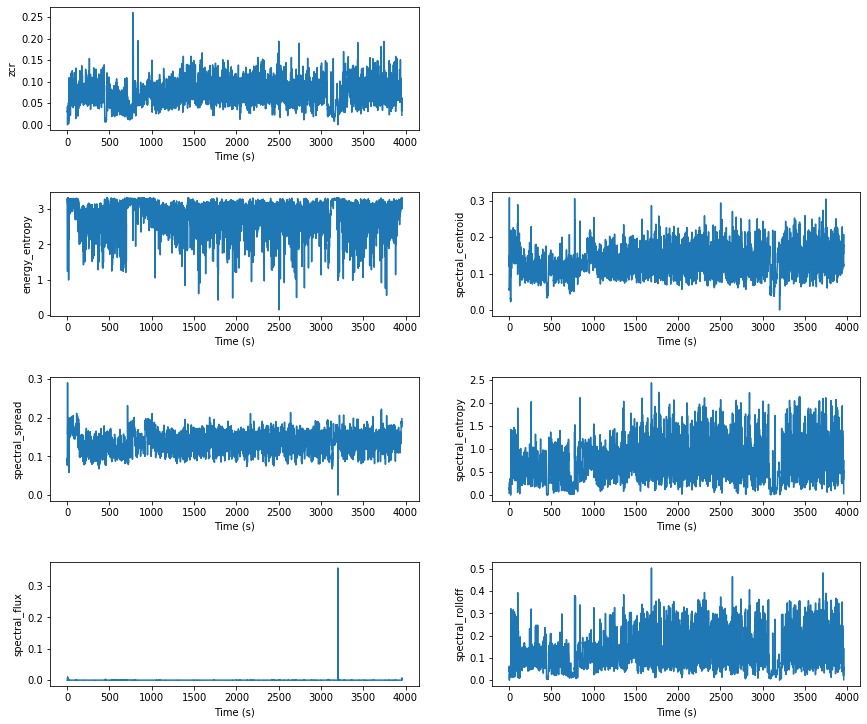

In [4]:
plt.subplots_adjust(right=2, top=3, bottom = 0, hspace = 0.5)

counter = 521
tot_frames = len(F[0])
secs = [(t*overlap + Fs/2)/Fs if t > 0 else 0 for t in range(0, tot_frames)]

for i in range(0,8):
    if(i != 1): # Skip energy, we already have that
        plt.subplot(counter+i); plt.plot(secs, F[i,:]); plt.xlabel('Time (s)'); plt.ylabel(f_names[i]) 

plt.show()

We can see how spectral flux is the feature with less discriminative power: this is because it measures the difference of the spectral amplitude between frames at time t and t+1, and for a speech audio this difference is more or less constant. For a musical audio, it would certainly have more impact since it would have a higher change-rate.